#### Compare PIDNET S, M, L ALL WITH WEIGHT DECAY:5e-4, cross entropy, optimizer SGD, lr:0.00625, batch size = 4
 t:0.5; lambda_0=0.4, lambda_1=0.6, lambda_2=1.0, lambda_3=0.1
 ##
 paper values:
 t: 0.8 lambda_0=0.4, lambda_1=20.0, lambda_2=1.0, lambda_3=1.0


In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the datasets
df_pidnet_s = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_100_percent.csv")
df_pidnet_m = pd.read_csv("pidnet_results/5_PIDNET_M_1ce_0.00625_totloss_100_percent.csv")  
df_pidnet_l= pd.read_csv("pidnet_results/5_PIDNET_L_1ce_0.00625_totloss_100_percent.csv")  
# values of paper
df_pidnet_s_paper = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_100_percent.csv")
df_pidnet_m_paper = pd.read_csv("pidnet_results/5_PIDNET_M_1ce_0.00625_totloss_samepaper_100_percent.csv")  
df_pidnet_l_paper= pd.read_csv("pidnet_results/5_PIDNET_L_1ce_0.00625_totloss_samepaper_100_percent.csv")  


FileNotFoundError: [Errno 2] No such file or directory: 'pidnet_results/5_PIDNET_L_1ce_0.00625_totloss_100_percent.csv'

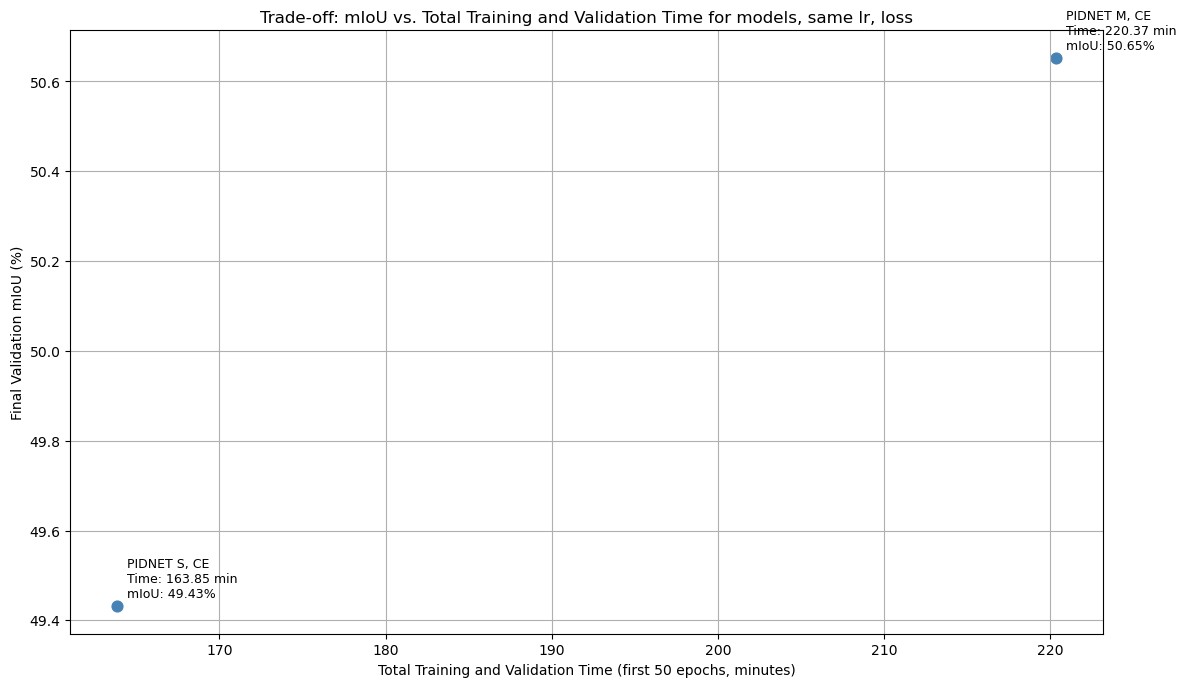

In [24]:

# Results container
results = []

def process_df(df, label):
    # Drop rows with missing key data and sort by epoch to get latest values reliably
    df_clean = df.dropna(subset=['epoch', 'val_mIoU', 'Runtime']).sort_values(by='epoch')
    
    if not df_clean.empty:
        # Total runtime in minutes
        total_runtime_sec = df_clean['Runtime'].sum()
        total_runtime_min = total_runtime_sec / 60

        # Final mIoU (at epoch 50, from val_mIoU_final)
        epoch_50_row = df[df['epoch'] == 50]
        if not epoch_50_row.empty and not pd.isna(epoch_50_row.iloc[0]['val_mIoU']):
            miou_epoch_50 = epoch_50_row.iloc[0]['val_mIoU']
        else:
            miou_epoch_50 = None  # or fallback to another value if needed

        # Save result
        results.append({
            'label': label,
            'miou': miou_epoch_50,
            'runtime': total_runtime_min
        })


        

# Process datasets
process_df(df_pidnet_s, 'PIDNET S, CE')
process_df(df_pidnet_m, 'PIDNET M, CE')
#process_df(df_pidnet_l, 'PIDNET L, CE')
#process_df(df_pidnet_s_paper, 'PIDNET S, CE PAPER VALUES')
#process_df(df_pidnet_m_paper, 'PIDNET M, CE PAPER VALUES')
#process_df(df_pidnet_l_paper, 'PIDNET L, CE PAPER VALUES')

# Extract data for plotting
runtimes = [r['runtime'] for r in results]
mious = [r['miou'] for r in results]
labels = [r['label'] for r in results]

# Plotting
plt.figure(figsize=(12, 7))
plt.scatter(runtimes, mious, color='steelblue', s=60)

offset_x = (max(runtimes) - min(runtimes)) * 0.01 if len(runtimes) > 1 else 0.5
offset_y = (max(mious) - min(mious)) * 0.01 if len(mious) > 1 else 0.05

for i, label in enumerate(labels):
    plt.text(runtimes[i] + offset_x, mious[i] + offset_y,
             f"{label}\nTime: {runtimes[i]:.2f} min\nmIoU: {mious[i]:.2f}%",
             fontsize=9, ha='left', va='bottom')

plt.xlabel('Total Training and Validation Time (first 50 epochs, minutes)')
plt.ylabel('Final Validation mIoU (%)')
plt.title('Trade-off: mIoU vs. Total Training and Validation Time for models, same lr, loss')
plt.grid(True)
plt.tight_layout()
plt.show()


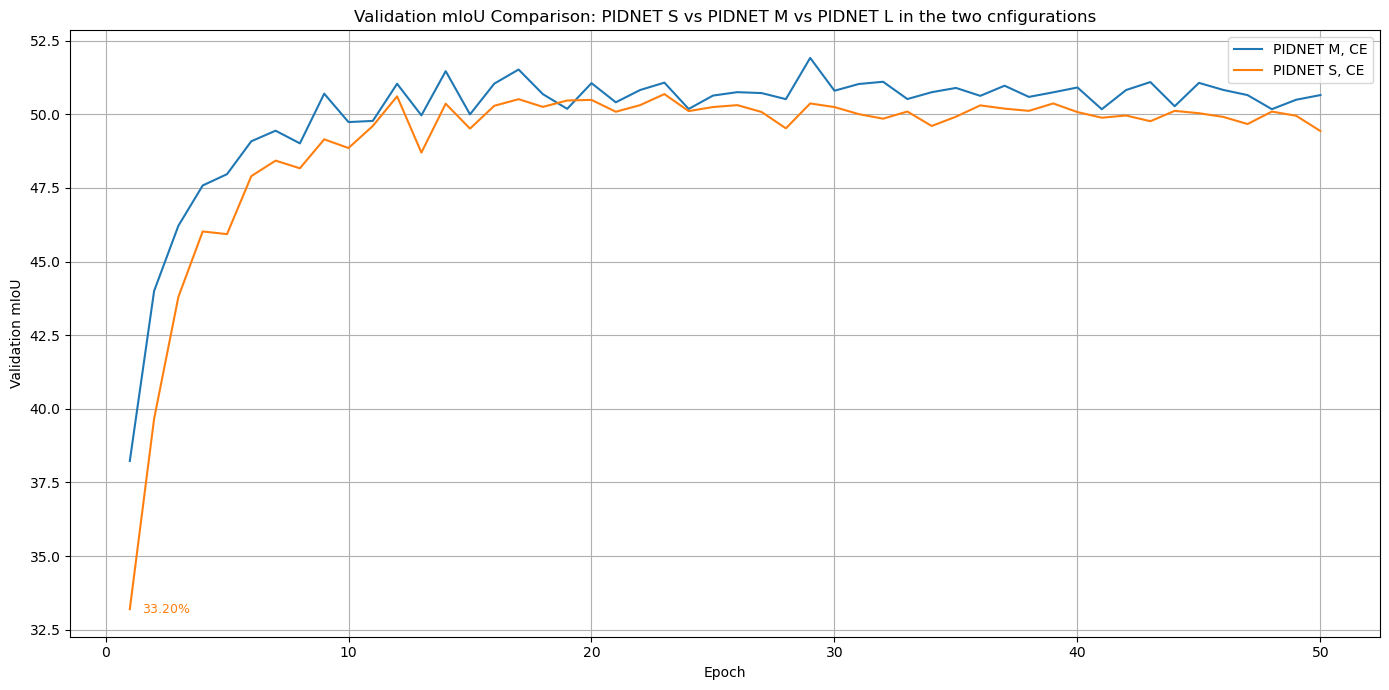

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Get last epoch values for text annotation ---
#last_l = df_pidnet_l.iloc[-1]
#last_m = df_pidnet_m.iloc[-1]
last_s = df_pidnet_s.iloc[-1]

# --- Plot ---
plt.figure(figsize=(14, 7))

# Plot the mIoU curves
#line_l, = plt.plot(df_pidnet_l['epoch'], df_pidnet_l['val_mIoU'], label='PIDNET L, CE')
line_m, = plt.plot(df_pidnet_m['epoch'], df_pidnet_m['val_mIoU'], label='PIDNET M, CE')
line_s, = plt.plot(df_pidnet_s['epoch'], df_pidnet_s['val_mIoU'], label='PIDNET S, CE')

#line_l_paper, = plt.plot(df_pidnet_l_paper['epoch'], df_pidnet_l_paper['val_mIoU'], label='PIDNET L, CE')
#line_m_paper, = plt.plot(df_pidnet_m_paper['epoch'], df_pidnet_m_paper['val_mIoU'], label='PIDNET M, CE')
#line_s_paper, = plt.plot(df_pidnet_s_paper['epoch'], df_pidnet_s_paper['val_mIoU'], label='PIDNET S, CE')

# --- Annotate final mIoU values ---
text_offset_x = 0.5

#plt.text(last_l['epoch'] + text_offset_x, last_l['val_mIoU'], f"{last_l['val_mIoU']:.2f}%",
#         color=line_l.get_color(), ha='left', va='center', fontsize=9)
#plt.text(last_m['epoch'] + text_offset_x, last_m['val_mIoU'], f"{last_m['val_mIoU']:.2f}%",
#         color=line_m.get_color(), ha='left', va='center', fontsize=9)
plt.text(last_s['epoch'] + text_offset_x, last_s['val_mIoU'], f"{last_s['val_mIoU']:.2f}%",
         color=line_s.get_color(), ha='left', va='center', fontsize=9)

# --- Styling ---
plt.xlabel('Epoch')
plt.ylabel('Validation mIoU')
plt.title('Validation mIoU Comparison: PIDNET S vs PIDNET M vs PIDNET L in the two cnfigurations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
